## Test batch creation

In [1]:
from main import *
from helpers import *
from ds import *

c:\Users\jputz\deepl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found cached dataset parquet (C:/Users/jputz/.cache/huggingface/datasets/segments___parquet/segments--sidewalk-semantic-2-1680095ec7b2b03f/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)
100%|██████████| 1/1 [00:00<00:00, 17.24it/s]
Loading cached shuffled indices for dataset at C:\Users\jputz\.cache\huggingface\datasets\segments___parquet\segments--sidewalk-semantic-2-1680095ec7b2b03f\0.0.0\14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7\cache-5eeb6ee8ca16ffb9.arrow


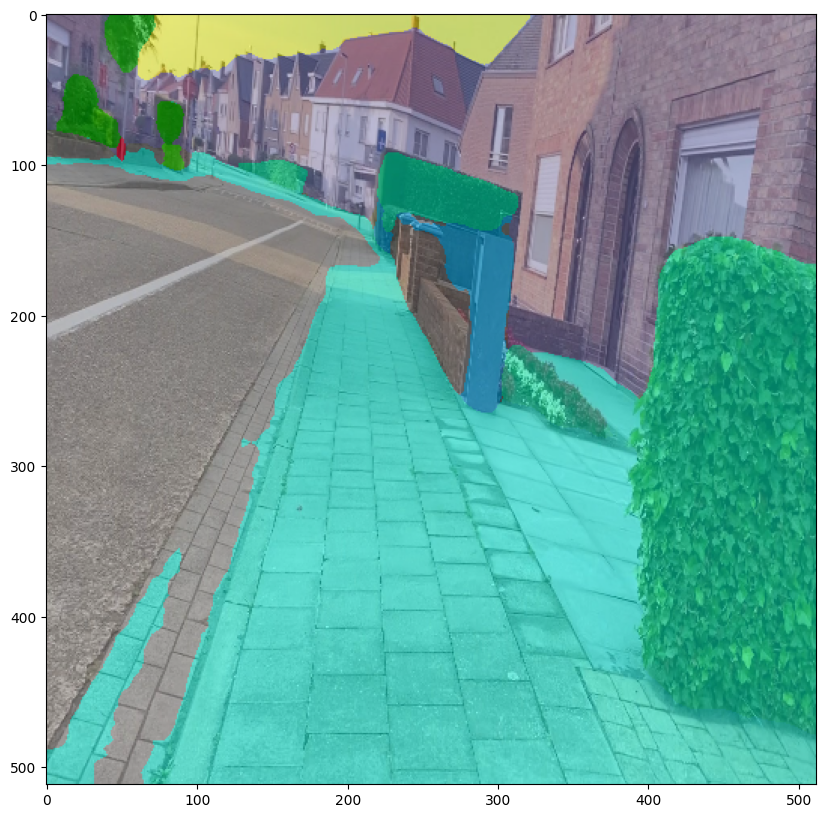

In [2]:
processor, model = load_model("facebook/mask2former-swin-tiny-ade-semantic")
train_ds, test_ds = make_dataset()
image, map, _, _ = test_ds[0]
pred = infer_img(processor, model, image)
show_overlay(image, pred)

In [3]:
train_dataloader = create_batch(train_ds, 2, processor)

In [4]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,v[0].shape)

pixel_values torch.Size([2, 3, 384, 384])
pixel_mask torch.Size([2, 384, 384])
mask_labels torch.Size([5, 384, 384])
class_labels torch.Size([5])
original_images (1080, 1920, 3)
original_segmentation_maps (1080, 1920)


In [5]:
pixel_values = batch["pixel_values"][0].numpy()
pixel_values.shape

(3, 384, 384)

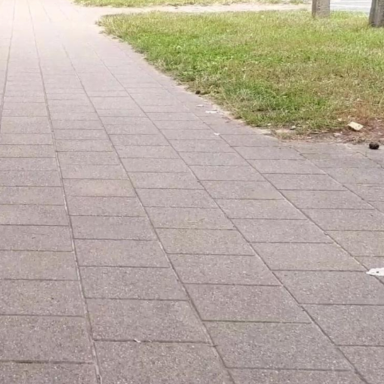

In [7]:
unnormalized_image = (pixel_values * np.array(ADE_STD)[:, None, None]) + np.array(ADE_MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [8]:
# verify class labels
labels = [id2label[label] for label in batch["class_labels"][0].tolist()]
print(labels)

['flat-sidewalk', 'flat-cyclinglane', 'flat-parkingdriveway', 'object-pole', 'nature-terrain']


In [9]:
# verify mask labels
batch["mask_labels"][0].shape

torch.Size([5, 384, 384])

In [10]:
def visualize_mask(labels, label_name):
  print("Label:", label_name)
  idx = labels.index(label_name)

  visual_mask = (batch["mask_labels"][0][idx].bool().numpy() * 255).astype(np.uint8)
  return Image.fromarray(visual_mask)

Label: flat-sidewalk


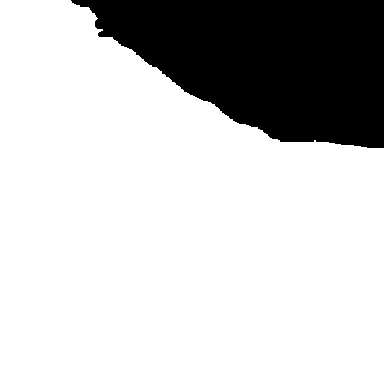

In [11]:
visualize_mask(labels, "flat-sidewalk")